# Importando bibliotecas

In [1]:
# biblotecas para manipulação de dados
import pandas as pd
import numpy as np

#Bibliotecas auxiliares
import os
from functools import reduce
import re

#Biblioteca propria
import sys
sys.path.append("../src/")
from eda.eda import describe
from io_pyarrow.io_pyarrow import pyarrow_read_csv,write_table_from_pandas #leitura e escrita de arquivos csv grandes

%matplotlib inline
%reload_ext watermark
%watermark --iversions

numpy : 1.20.1
re    : 2.2.1
pandas: 1.2.2
sys   : 3.7.4 (default, Aug  9 2019, 18:34:13) [MSC v.1915 64 bit (AMD64)]



___

# Importando arquivos

In [2]:
#Definindo path dos arquivos
path_data = "../data/raw/"

## SEADE
fonte: https://www.seade.gov.br/coronavirus/

In [3]:
casos_obitos_raca_cor = pyarrow_read_csv(path_data+"SEADE/casos_obitos_raca_cor.csv",sep=";")

___

# Analisando as bases de dados

In [4]:
describe(casos_obitos_raca_cor)

Quantidade de linhas: 2856225


variable     type    na na_pct  unique        min     quat25  \
0           codigo_ibge  float64   571  0.02%     645  3500105.0  3519071.0   
1            nome_munic   object     0   0.0%     646          -          -   
2              nome_drs   object     0   0.0%      23          -          -   
3                 obito     bool     0   0.0%       2      False        0.0   
4              raca_cor   object     0   0.0%       8          -          -   
5                 idade  float64  6293  0.22%     140      -41.0       29.0   
6               cs_sexo   object     0   0.0%       5          -          -   
7   diagnostico_covid19   object     0   0.0%       1          -          -   
8                  asma   object     0   0.0%       5          -          -   
9           cardiopatia   object     0   0.0%       5          -          -   
10             diabetes   object     0   0.0%       5          -          -   
11  doenca_hematologica   object     0   0.0%       5          -          -   
12      doenca_hepatica   object     0   0.0%       5          -          -   
13   doenca_neurologica   object     0   0.0%       5          -          -   
14         doenca_renal   object     0   0.0%       5          -          -   
15       imunodepressao   object     0   0.0%       5          -          -   
16            obesidade   object     0   0.0%       5          -          -   
17          pneumopatia   object     0   0.0%       5          -          -   
18             puerpera   object     0   0.0%       5          -          -   
19     sindrome_de_down   object     0   0.0%       5          -          -   

       median            mean     quat75        max           std skewness  \
0   3543402.0  3535227.961549  3550308.0  3557303.0  17174.868851    -0.57   
1           -               -          -          -             -        -   
2           -               -          -          -             -        -   
3         0.0        0.032855        0.0       True      0.178258        -   
4           -               -          -          -             -        -   
5        40.0       41.596797       53.0      136.0     17.579209     0.32   
6           -               -          -          -             -        -   
7           -               -          -          -             -        -   
8           -               -          -          -             -        -   
9           -               -          -          -             -        -   
10          -               -          -          -             -        -   
11          -               -          -          -             -        -   
12          -               -          -          -             -        -   
13          -               -          -          -             -        -   
14          -               -          -          -             -        -   
15          -               -          -          -             -        -   
16          -               -          -          -             -        -   
17          -               -          -          -             -        -   
18          -               -          -          -             -        -   
19          -               -          -          -             -        -   

   kurtosis media_desvio  
0      -1.2       205.84  
1         -            -  
2         -            -  
3         -            -  
4         -            -  
5     -0.05         2.37  
6         -            -  
7         -            -  
8         -            -  
9         -            -  
10        -            -  
11        -            -  
12        -            -  
13        -            -  
14        -            -  
15        -            -  
16        -            -  
17        -            -  
18        -            -  
19        -            -

In [5]:
casos_obitos_raca_cor.head()

codigo_ibge             nome_munic               nome_drs  obito  raca_cor  \
0    3500303.0                  Aguaí  São João da Boa Vista  False  IGNORADO   
1    3555000.0                   Tupã                Marília  False     PARDA   
2    3534401.0                 Osasco        Grande SP Oeste  False     PARDA   
3    3548708.0  São Bernardo do Campo      Grande SP Sudeste  False     PARDA   
4    3557006.0             Votorantim               Sorocaba  False    BRANCA   

   idade   cs_sexo diagnostico_covid19 asma cardiopatia diabetes  \
0   41.0  FEMININO          CONFIRMADO   NA           9        9   
1   31.0  FEMININO          CONFIRMADO   NA           9        9   
2   32.0  FEMININO          CONFIRMADO   NA           9        9   
3   41.0  FEMININO          CONFIRMADO   NA           9        9   
4   44.0  FEMININO          CONFIRMADO   NA           9        9   

  doenca_hematologica doenca_hepatica doenca_neurologica doenca_renal  \
0                  NA              NA                 NA            9   
1                  NA              NA                 NA            9   
2                  NA              NA                 NA            9   
3                  NA              NA                 NA            9   
4                  NA              NA                 NA            9   

  imunodepressao obesidade pneumopatia puerpera sindrome_de_down  
0              9        NA          NA       NA               NA  
1              9        NA          NA       NA               NA  
2              9        NA          NA       NA               NA  
3              9        NA          NA       NA               NA  
4              9        NA          NA       NA               NA

In [6]:
casos_ = casos_obitos_raca_cor.copy()

## nome_munic

In [7]:
casos_.nome_munic.isna().sum()

0

In [8]:
casos_.nome_munic.value_counts()

São Paulo                 708635
Campinas                   75950
São José do Rio Preto      64552
São José dos Campos        61441
São Bernardo do Campo      57028
                           ...  
Óleo                          58
Nova Castilho                 51
Borá                          48
Santana da Ponte Pensa        37
São Luiz do Paraitinga        29
Name: nome_munic, Length: 646, dtype: int64

In [9]:
#Mais uma vez, temos 646 municipios e não 645, conforme constam os dados oficiais
cidades_sp = ['São Paulo', 'Campinas', 'São José do Rio Preto', 'São José dos Campos', 'São Bernardo do Campo', 'Ribeirão Preto', 'Guarulhos',
 'Santo André', 'Santos','Sorocaba', 'Piracicaba', 'Jundiaí', 'Bauru', 'Osasco', 'Carapicuíba', 'Barueri', 'Mogi das Cruzes', 'Araçatuba',
 'Franca', 'Mauá', 'Diadema', 'Presidente Prudente', 'Taubaté', 'Marília', 'Sumaré', 'Indaiatuba', 'São Carlos', 'Jacareí', 'Suzano', 'Guarujá',
 'Hortolândia', 'Araraquara', 'Americana', 'Limeira', 'Praia Grande', 'Taboão da Serra', "Santa Bárbara d'Oeste", 'São Caetano do Sul',
 'São Vicente', 'Araras', 'Itu', 'Caraguatatuba', 'Itaquaquecetuba', 'Bragança Paulista', 'Mogi Guaçu', 'Paulínia', 'Sertãozinho', 'Itapetininga',
 'Votuporanga', 'Cubatão', 'Botucatu', 'Birigui', 'Barretos', 'Santana de Parnaíba', 'Cotia', 'Valinhos', 'Lençóis Paulista', 'Rio Claro',
 'Franco da Rocha', 'Ourinhos', 'Pindamonhangaba', 'Atibaia', 'Francisco Morato', 'Itapevi', 'Catanduva', 'Embu das Artes', 'Mogi Mirim',
 'Fernandópolis', 'Ferraz de Vasconcelos', 'Leme', 'Salto', 'Itatiba', 'Jaú', 'Lins', 'Assis', 'Olímpia', 'Ribeirão Pires', 'Pirassununga',
 'Caieiras', 'Vinhedo', 'Mirassol', 'São Sebastião', 'Votorantim', 'Avaré', 'Arujá', 'Itapecerica da Serra', 'Poá', 'Guaratinguetá',
 'São João da Boa Vista', 'Caçapava', 'Ilhabela', 'Ibitinga', 'Cosmópolis', 'Porto Feliz', 'Ubatuba', 'Tatuí', 'Jandira', 'Itapira', 'Mairiporã',
 'Itapeva', 'Peruíbe', 'Várzea Paulista', 'Registro', 'Santa Isabel', 'Jales', 'Jaboticabal', 'Penápolis', 'Bertioga', 'Andradina', 'São Roque',
 'Nova Odessa', 'Mococa', 'Itupeva', 'Dracena', 'Itanhaém', 'Promissão', 'Boituva', 'Pontal', 'Amparo', 'Cruzeiro', 'Monte Mor', 
 'Campo Limpo Paulista', 'Itararé', 'Serrana', 'Embu-Guaçu', 'José Bonifácio', 'São Joaquim da Barra', 'Guaíra', 'Lorena', 'Cerquilho',
 'Jaguariúna', 'Espírito Santo do Pinhal', 'Taquaritinga', 'Campos do Jordão', 'Cajamar', 'Cordeirópolis', 'Capivari', 'Monte Alto', 'Pitangueiras',
 'Tupã', 'Porto Ferreira', 'Novo Horizonte', 'Bebedouro', 'Piedade', 'Iracemápolis', 'Morro Agudo', 'Artur Nogueira', 'Matão', 'São Pedro',
 'Capão Bonito', 'Tanabi', 'Itápolis', 'Américo Brasiliense', 'Orlândia', 'Cabreúva', 'São Manuel', 'Guariba', 'Santa Cruz do Rio Pardo', 'Pederneiras',
 'Cajati', 'Louveira', 'Mairinque', 'Santa Fé do Sul', 'Laranjal Paulista', 'Guareí', 'Santa Cruz das Palmeiras', 'Ibaté', 'Agudos', 'Pedreira',
 'Barra Bonita', 'Ibiúna', 'Jardinópolis', 'Descalvado', 'Garça', 'Macatuba', 'Santa Gertrudes', 'Salto de Pirapora', 'Guararapes', 'Adamantina',
 'Piracaia', 'Paraguaçu Paulista', 'Cândido Mota', 'Socorro', 'Rancharia', 'Bady Bassitt', 'Bariri', 'Tietê', 'Angatuba', 'Nova Granada', 'Batatais',
 'Buri', 'Aparecida', 'Taquarituba', 'Rio das Pedras', 'Araçoiaba da Serra', 'Vargem Grande do Sul', 'Engenheiro Coelho', 'Presidente Venceslau',
 'Santo Antônio de Posse', 'Osvaldo Cruz', 'Aguaí', 'Presidente Epitácio', 'Cachoeira Paulista', 'Potirendaba', 'Tambaú', 'Buritama', 'Ilha Solteira',
 'Severínia', 'Iperó', 'Pariquera-Açu', 'Igaratá', 'Tremembé', 'Brodowski', 'Jarinu', 'Monte Aprazível', 'Pirapozinho', 'Rio Grande da Serra',
 'Serra Negra', 'Vargem Grande Paulista', 'Pilar do Sul', 'Guapiara', 'Valparaíso', 'Bom Jesus dos Perdões', 'Palmital', 'Juquitiba', 'Casa Branca',
 'Auriflama', 'Pirajuí', 'Guapiaçu', 'Iguape', 'Mirandópolis', 'Castilho', 'Santa Rosa de Viterbo', 'Conchas', 'São José do Rio Pardo', 'Conchal',
 'Itaberá', 'Itaí', 'Valentim Gentil', 'Miracatu', 'Tabatinga', 'Viradouro', 'Guará', 'Holambra', 'Potim', 'Igaraçu do Tietê', 'Teodoro Sampaio',
 'Álvares Machado', 'Pereira Barreto', 'Mongaguá', 'Pirapora do Bom Jesus', 'Sales Oliveira', 'Pradópolis', 'Tupi Paulista', 'Ipuã', 'Juquiá',
 'Itatinga', 'Guararema', 'Bálsamo', 'Cravinhos', 'Dois Córregos', 'Monte Azul Paulista', 'Ituverava', 'Junqueirópolis', 'Barrinha', 'Pirangi',
 'Itajobi', 'Taguaí', 'Cerqueira César', 'Piraju', 'Araçariguama', 'Luís Antônio', 'Sete Barras', 'Itirapina', 'Cesário Lange', 'Ipaussu',
 'Ribeirão Branco', 'Alumínio', 'Igarapava', 'Santo Anastácio', 'Nazaré Paulista', 'Bocaina', 'Itaporanga', 'Santa Rita do Passa Quatro', 'Guaiçara',
 'Jacupiranga', 'São Miguel Arcanjo', 'Capela do Alto', 'Itapuí', 'Eldorado', 'Ibirá', 'Maracaí', 'Águas de Lindóia', 'Paranapanema','Fartura',
 'Colina', 'Serra Azul', 'Charqueada', 'Riolândia', 'Elias Fausto', 'Santa Adélia', 'Biritiba Mirim', 'Roseira', 'Dumont', "Estrela d'Oeste",
 'Itariri', 'Martinópolis', 'Tarumã', 'Mineiros do Tietê', 'Palmares Paulista', 'Uchoa', 'Pacaembu', 'Caconde', 'Apiaí', 'Lucélia', 'Borborema',
 'Tabapuã', 'Urânia', 'Paraibuna', 'Rosana', 'Tapiratiba', 'Orindiúva', 'Flórida Paulista', 'Divinolândia', 'Neves Paulista', 'Pindorama', 'Ouroeste',
 'Miguelópolis', 'Gavião Peixoto', 'Areiópolis', 'Ilha Comprida', 'Iacanga', 'Quatá', 'Nhandeara', 'General Salgado', 'Presidente Bernardes',
 'Panorama', 'Torrinha', 'Joanópolis', 'Queluz', 'Boracéia', 'Getulina', 'Ipiguá', 'Cedral', 'Bananal', 'Cardoso', 'Bilac', 'Parapuã', 'Sud Mennucci',
 'Altinópolis', 'Boa Esperança do Sul', 'Icém', 'Cajuru', 'Guaraci', 'Cajobi', 'Taiúva', 'Santa Branca', 'Lavínia', 'São Sebastião da Grama',
 'Pereiras', 'Morungaba', 'Cafelândia', 'São Simão', 'Vista Alegre do Alto', 'Américo de Campos', 'Cristais Paulista', 'Nova Aliança', 'Mendonça',
 'Ribeirão Bonito', 'Clementina', 'Onda Verde', 'Jaci', 'Cunha', 'Piratininga', 'Urupês', 'Patrocínio Paulista', 'Rafard', 'Herculândia',
 'Nova Europa', 'Guaraçaí', "Aparecida d'Oeste", 'Terra Roxa', 'Pompéia', 'Arealva', 'Duartina', 'Ubarana', 'São Lourenço da Serra', 'Bofete',
 'Narandiba', 'Cananéia', 'Cosmorama', 'Catiguá', 'Estiva Gerbi', 'Avanhandava', 'Santa Albertina', 'Ibirarema', 'Piacatu', 'Iepê', 'Chavantes',
 'Mirante do Paranapanema', 'Pinhalzinho', "Palmeira d'Oeste", 'Bastos', 'Fernando Prestes', 'Itobi', 'Santa Lúcia', 'Manduri', 'Porangaba',
 'Saltinho', 'Irapuru', 'Salto Grande', 'Tarabai', 'Pratânia', 'Lindóia', 'Regente Feijó', 'Três Fronteiras', 'São Pedro do Turvo', 'Coroados',
 'Paulo de Faria', 'Santo Antônio do Aracanguá', 'Santa Cruz da Conceição', 'Barra do Turvo', 'Nova Campina', 'Irapuã', 'Palestina', 'Itapirapuã Paulista',
 'São Bento do Sapucaí', 'Brotas', 'Monte Castelo', 'Alambari', 'Salesópolis', 'João Ramalho', 'Vera Cruz', 'Planalto', 'Dourado', 'Pardinho',
 'Canitar', 'Guzolândia', 'Águas da Prata', 'Dobrada', 'Jaborandi', 'Santo Antônio do Pinhal', 'Ipeúna', 'Santo Antônio da Alegria', 'Bernardino de Campos',
 'Ribeirão do Sul', 'Macaubal', 'Poloni', 'Ariranha', 'Adolfo', 'Campina do Monte Alegre', 'Santópolis do Aguapeí', 'Santa Maria da Serra',
 'Itaju', 'Santo Antônio do Jardim', 'Monte Alegre do Sul', 'Ouro Verde', 'Braúna', 'Santa Ernestina', 'Echaporã', 'Guaimbê', 'Taciba',
 'Barbosa', 'Mirassolândia', 'Nipoã', 'Tapiraí', 'Álvares Florence', 'Gália', 'Elisiário', 'Corumbataí', 'Nova Independência', 'Paranapuã',
 'Balbinos', 'Rincão', 'Sarapuí', 'Parisi', 'Paulicéia', 'Quintana', 'Colômbia', 'Paraíso', 'Rifaina', 'Águas de Santa Bárbara', 'Riversul',
 'Coronel Macedo', 'Mira Estrela', 'Piquete', 'Silveiras', 'Suzanápolis', 'Jambeiro', 'Taiaçu', 'Glicério', 'Restinga', 'Ribeirão Grande',
 'Sales', 'Marapoama', 'Nuporanga', 'Brejo Alegre', 'Jumirim', 'Rubinéia', 'Guatapará', 'Reginópolis', 'Meridiano', 'Euclides da Cunha Paulista',
 'Avaí', 'Pedro de Toledo', 'Macedônia', 'Pontes Gestal', 'Arandu', 'Sabino', 'Motuca', 'Salmourão', 'Analândia', 'Pedregulho', 'Ocauçu',
 'Ribeira', 'Rinópolis', 'Inúbia Paulista', 'Caiuá', 'Bento de Abreu', 'Murutinga do Sul', 'Nova Luzitânia', 'Aramina', 'Taquaral', 'Areias',
 'Itaoca', 'Estrela do Norte', 'Novais', 'Guarantã', 'Zacarias', 'Iporanga', 'Cabrália Paulista', 'Alto Alegre', 'Barra do Chapéu', 'Ubirajara',
 'Oscar Bressane', 'Presidente Alves', 'Itirapuã', 'Taquarivaí', 'Águas de São Pedro', 'Lourdes', 'Emilianópolis', 'Lavrinhas', 'Buritizal',
 'Pedrinhas Paulista', 'Mombuca', 'Oriente', 'Espírito Santo do Turvo', 'Alfredo Marcondes', 'Indiana', 'Jeriquara', 'São José do Barreiro',
 'Campos Novos Paulista', 'Iacri', 'Pongaí', 'Anhumas', 'Arapeí', 'Platina', 'Sandovalina', 'Pedranópolis', 'Luiziânia', 'São Francisco',
 'Itapura', 'Barão de Antonina', 'São José da Bela Vista', 'Lupércio', "Santa Rita d'Oeste", 'Monções', 'Pracinha', 'Iaras', 'Pedra Bela',
 'Vitória Brasil', 'Nova Guataporanga', 'Ribeirão Corrente', 'Lutécia', 'Santa Salete', 'Monteiro Lobato', 'Queiroz', 'Nova Canaã Paulista',
 'Cássia dos Coqueiros', 'Piquerobi', 'Canas', 'Marinópolis', 'Mariápolis', 'Magda', 'Vargem', 'Indiaporã', 'Santo Expedito', 'Dolcinópolis',
 "Santa Clara d'Oeste", 'São João das Duas Pontes', 'Álvaro de Carvalho', 'Lagoinha', 'Pontalinda', 'Gastão Vidigal', 'Nantes', 'Turiúba',
 'Altair', 'Fernão', 'Floreal', 'Turmalina','Tuiuti', 'Anhembi', 'Populina', 'Florínea', 'Santa Cruz da Esperança', 'Uru', 'Borebi', 'Tejupá',
 'Gabriel Monteiro', 'Bom Sucesso de Itararé', 'Quadra', 'Santa Mercedes', 'Mesópolis', 'União Paulista', "Guarani d'Oeste", 'Alvinlândia',
 'Sebastianópolis do Sul', 'Flora Rica', 'Cruzália', 'Cândido Rodrigues', 'Sagres', "São João do Pau d'Alho", 'Natividade da Serra', 'Sarutaiá',
 'Lucianópolis', 'Júlio Mesquita', 'Dirce Reis', 'Timburi', 'Aspásia', 'Arco-Íris', 'São João de Iracema', 'Marabá Paulista', 'Embaúba',
 'Rubiácea', 'Redenção da Serra', 'Paulistânia', 'Caiabu', 'Torre de Pedra', 'Trabiju', 'Ribeirão dos Índios', 'Óleo', 'Nova Castilho',
 'Borá', 'Santana da Ponte Pensa', 'São Luiz do Paraitinga']

In [15]:
#Existem dados faltantes, mas com o escrito 'NA'
casos_[casos_.nome_munic.isin(cidades_sp) == False].nome_munic.value_counts(dropna=False)

NA    571
Name: nome_munic, dtype: int64

In [16]:
casos_.nome_munic = casos_.nome_munic.apply(lambda x: np.nan if x == 'NA' else x)

In [17]:
casos_.nome_munic.value_counts(dropna = False).sort_index()

Adamantina            2373
Adolfo                 374
Aguaí                 1856
Agudos                2592
Alambari               424
                      ... 
Álvares Florence       326
Álvares Machado       1310
Álvaro de Carvalho     136
Óleo                    58
NaN                    571
Name: nome_munic, Length: 646, dtype: int64

## nome_drs

In [18]:
casos_.nome_drs.isna().sum()

0

In [19]:
#O mesmo ocorre aqui com 'NA'
casos_.nome_drs.value_counts(dropna=False)

Município de São Paulo    708635
Campinas                  309097
Taubaté                   172049
Grande SP Sudeste         167612
São José do Rio Preto     163206
Sorocaba                  158678
Bauru                     130793
Grande SP Leste           125152
Piracicaba                120393
Baixada Santista          118239
Ribeirão Preto            103996
Grande SP Oeste           103694
Marília                    70449
Araraquara                 66159
Araçatuba                  63869
São João da Boa Vista      54013
Presidente Prudente        48279
Grande SP Sudoeste         45424
Franca                     40373
Barretos                   33868
Grande SP Norte            31791
Registro                   19885
NA                           571
Name: nome_drs, dtype: int64

In [21]:
casos_.nome_drs = casos_.nome_drs.apply(lambda x: np.nan if x == 'NA' else x)
casos_.nome_drs.value_counts(dropna=False)

Município de São Paulo    708635
Campinas                  309097
Taubaté                   172049
Grande SP Sudeste         167612
São José do Rio Preto     163206
Sorocaba                  158678
Bauru                     130793
Grande SP Leste           125152
Piracicaba                120393
Baixada Santista          118239
Ribeirão Preto            103996
Grande SP Oeste           103694
Marília                    70449
Araraquara                 66159
Araçatuba                  63869
São João da Boa Vista      54013
Presidente Prudente        48279
Grande SP Sudoeste         45424
Franca                     40373
Barretos                   33868
Grande SP Norte            31791
Registro                   19885
NaN                          571
Name: nome_drs, dtype: int64

## obito

In [25]:
casos_.obito.value_counts(dropna=False)

False    2762383
True       93842
Name: obito, dtype: int64

## raca_cor

In [26]:
#Existem alguns casos como IGNORADO, NA e NONE que devemos desconsiderar
casos_.raca_cor.value_counts(dropna=False)

BRANCA      1477499
PARDA        557518
IGNORADO     543276
PRETA        104741
AMARELA       71353
NONE          51881
NA            47931
INDIGENA       2026
Name: raca_cor, dtype: int64

In [29]:
casos_.raca_cor = casos_.raca_cor.apply(lambda x: np.nan if ((x == 'NONE') | (x == 'NA') | (x == 'IGNORADO')) else x)
casos_.raca_cor.value_counts(dropna=False,normalize=True)*100

BRANCA      51.729083
NaN         22.515313
PARDA       19.519401
PRETA        3.667113
AMARELA      2.498158
INDIGENA     0.070933
Name: raca_cor, dtype: float64

## idade

<AxesSubplot:>

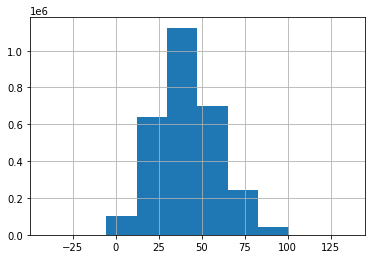

In [31]:
#Pelo histograma de idade, vemos que há idades negativas e bem superiores a 100
casos_.idade.hist()

<AxesSubplot:>

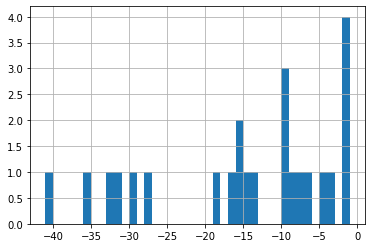

In [33]:
#Analisando as negativas
casos_.query("idade < 0").idade.hist(bins=40)

In [34]:
#É bem provavel que essas idades tenham sido colocadas com valores negativos erroneamente. Vamos apenas deixar seu valor absoluto
casos_.idade = casos_.idade.abs()

<AxesSubplot:>

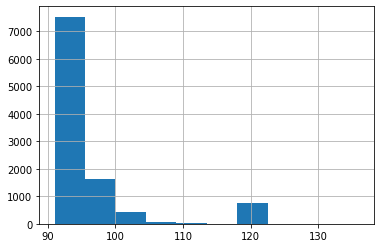

In [35]:
#Vamos verificar os casos com idades bem avançadas
casos_.query("idade >90 ").idade.hist()

In [36]:
#Assim como na analise dos obitos por doenças pre existentes, existem casos com mais de 120. Conforme nossa consulta pelo livro dos recordes,
#o homem mais velho vivo encontrado desde a oficialização dos recordes, tinha 116
# https://www.guinnessworldrecords.com.br/world-records/oldest-person-(male)
# Atualmente, a pessoa mais velha do mundo possui 117
# https://www.guinnessworldrecords.com.br/world-records/84549-oldest-person-living

#vamos remover os casos com mais de 117 anos
casos_.idade = casos_.idade.apply(lambda x: np.nan if x >= 117 else x)

<AxesSubplot:>

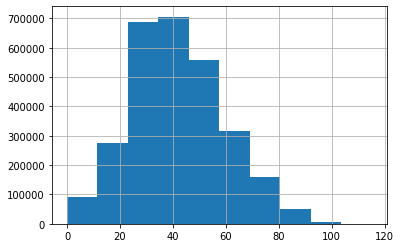

In [37]:
casos_.idade.hist()

## cs_sexo

In [40]:
#Vamos considerar como valores faltantes os casos indefinidos, ignorado e NA, considerando que, o que queremos com essa informação, é o
#genero de nascimento
casos_.cs_sexo.value_counts(dropna=False)

FEMININO      1524022
MASCULINO     1327492
INDEFINIDO       4683
IGNORADO           27
NA                  1
Name: cs_sexo, dtype: int64

In [44]:
casos_.cs_sexo = pd.Categorical(casos_.cs_sexo.replace({"INDEFINIDO":np.nan,"IGNORADO":np.nan,"NA":np.nan}).str.lower(),
                                categories = ["masculino","feminino"])

## diagnostico_covid19

In [48]:
#Essa coluna possui apenas um unico valor. Dessa forma, vamos removê-la da analise
casos_.diagnostico_covid19.value_counts(dropna=False)

CONFIRMADO    2856225
Name: diagnostico_covid19, dtype: int64

In [49]:
casos_ = casos_.drop(columns = "diagnostico_covid19")

# PRIORIDADE NA VACINAÇÃO

In [50]:
prioridade_vacinacao = ['asma', 'cardiopatia', 'diabetes',
                        'doenca_hematologica', 'doenca_hepatica', 'doenca_neurologica',
                        'doenca_renal', 'imunodepressao', 'obesidade', 'pneumopatia',
                        'puerpera', 'sindrome_de_down']

In [51]:
casos_[prioridade_vacinacao]

asma cardiopatia diabetes doenca_hematologica doenca_hepatica  \
0          NA           9        9                  NA              NA   
1          NA           9        9                  NA              NA   
2          NA           9        9                  NA              NA   
3          NA           9        9                  NA              NA   
4          NA           9        9                  NA              NA   
...       ...         ...      ...                 ...             ...   
2856220    NA           1        9                  NA              NA   
2856221  None        None     None                None            None   
2856222    NA           9        9                  NA              NA   
2856223    NA           9        9                  NA              NA   
2856224    NA           9        9                  NA              NA   

        doenca_neurologica doenca_renal imunodepressao obesidade pneumopatia  \
0                       NA            9              9        NA          NA   
1                       NA            9              9        NA          NA   
2                       NA            9              9        NA          NA   
3                       NA            9              9        NA          NA   
4                       NA            9              9        NA          NA   
...                    ...          ...            ...       ...         ...   
2856220                 NA            9              9        NA          NA   
2856221               None         None           None      None        None   
2856222                 NA            9              9        NA          NA   
2856223                 NA            9              9        NA          NA   
2856224                 NA            9              9        NA          NA   

        puerpera sindrome_de_down  
0             NA               NA  
1             NA               NA  
2             NA               NA  
3             NA               NA  
4             NA               NA  
...          ...              ...  
2856220       NA               NA  
2856221     None             None  
2856222       NA               NA  
2856223       NA               NA  
2856224       NA               NA  

[2856225 rows x 12 columns]

In [52]:
#Existem colunas, dentre as prioridades de vacinação, que são numericas e outras que não categóricas. Vamos fazer essa distinção
casos_[prioridade_vacinacao].dtypes

asma                   object
cardiopatia            object
diabetes               object
doenca_hematologica    object
doenca_hepatica        object
doenca_neurologica     object
doenca_renal           object
imunodepressao         object
obesidade              object
pneumopatia            object
puerpera               object
sindrome_de_down       object
dtype: object

In [57]:
#Na realidade, o que acontece, é que os valores são os mesmos, mas temos alguns valores como "NA" e "None"
# De acordo com o dicionario de dados (https://github.com/seade-R/dados-covid-sp), o numero representa o fator de risco da doença/sindrome
# e para o caso de puerpera, a paciente encontra-se no dito estágio

for p in prioridade_vacinacao:
    print(p,np.sort(casos_[p].unique()))

asma ['1' '2' '9' 'NA' 'None']
cardiopatia ['1' '2' '9' 'NA' 'None']
diabetes ['1' '2' '9' 'NA' 'None']
doenca_hematologica ['1' '2' '9' 'NA' 'None']
doenca_hepatica ['1' '2' '9' 'NA' 'None']
doenca_neurologica ['1' '2' '9' 'NA' 'None']
doenca_renal ['1' '2' '9' 'NA' 'None']
imunodepressao ['1' '2' '9' 'NA' 'None']
obesidade ['1' '2' '9' 'NA' 'None']
pneumopatia ['1' '2' '9' 'NA' 'None']
puerpera ['1' '2' '9' 'NA' 'None']
sindrome_de_down ['1' '2' '9' 'NA' 'None']


In [58]:
#Como todos possuem o mesmo range de valores, vamos realizar o mesmo tratamento para todos.
for p in prioridade_vacinacao:
    casos_[p] = casos_[p].apply(lambda x: np.nan if ((x == 'NA') | (x == 'None')) else float(x))
    casos_[p] = pd.Categorical(casos_[p],categories=[1,2,9],ordered=True)

# Salvando arquivo de dados 

In [68]:
describe(casos_)

Quantidade de linhas: 2856225


variable      type       na  na_pct  unique        min  \
0           codigo_ibge   float64      571   0.02%     645  3500105.0   
1            nome_munic    object      571   0.02%     645          -   
2              nome_drs    object      571   0.02%      22          -   
3                 obito      bool        0    0.0%       2      False   
4              raca_cor    object   643088  22.52%       5          -   
5                 idade   float64     7050   0.25%     114        0.0   
6               cs_sexo  category     4711   0.16%       2          -   
7                  asma  category  2723628  95.36%       3          -   
8           cardiopatia  category   160107   5.61%       3          -   
9              diabetes  category   171892   6.02%       3          -   
10  doenca_hematologica  category  2725539  95.42%       3          -   
11      doenca_hepatica  category  2725978  95.44%       3          -   
12   doenca_neurologica  category  2722495  95.32%       3          -   
13         doenca_renal  category   198819   6.96%       3          -   
14       imunodepressao  category   199727   6.99%       3          -   
15            obesidade  category  2720171  95.24%       3          -   
16          pneumopatia  category  2722579  95.32%       3          -   
17             puerpera  category  2726710  95.47%       3          -   
18     sindrome_de_down  category  2726133  95.45%       3          -   

       quat25     median            mean     quat75        max           std  \
0   3519071.0  3543402.0  3535227.961549  3550308.0  3557303.0  17174.868851   
1           -          -               -          -          -             -   
2           -          -               -          -          -             -   
3         0.0        0.0        0.032855        0.0       True      0.178258   
4           -          -               -          -          -             -   
5        29.0       40.0       41.576203       53.0      115.0     17.534324   
6           -          -               -          -          -             -   
7           -          -               -          -          -             -   
8           -          -               -          -          -             -   
9           -          -               -          -          -             -   
10          -          -               -          -          -             -   
11          -          -               -          -          -             -   
12          -          -               -          -          -             -   
13          -          -               -          -          -             -   
14          -          -               -          -          -             -   
15          -          -               -          -          -             -   
16          -          -               -          -          -             -   
17          -          -               -          -          -             -   
18          -          -               -          -          -             -   

   skewness kurtosis media_desvio  
0     -0.57     -1.2       205.84  
1         -        -            -  
2         -        -            -  
3         -        -            -  
4         -        -            -  
5      0.31    -0.13         2.37  
6         -        -            -  
7         -        -            -  
8         -        -            -  
9         -        -            -  
10        -        -            -  
11        -        -            -  
12        -        -            -  
13        -        -            -  
14        -        -            -  
15        -        -            -  
16        -        -            -  
17        -        -            -  
18        -        -            -

In [69]:
write_table_from_pandas(casos_,"../data/interim/obitos_raca_cor.parquet")